In [30]:
import tifffile
import numpy as np


# In there upload the image you want split
# original_image = tifffile.imread(r'G:\Alexis_data\Project\FISH\input\Heart2_round3_DAPI_resliced-q1-z1_cp_masks.tif')

original_image = tifffile.imread(r'G:\Alexis_data\Project\FISH\input\Heart2_round3_DAPI_resliced.tif')

# Print image shape and data type
print(f"Image shape: {original_image.shape}")
print(f"Data type: {original_image.dtype}")

# Display basic statistics
print(f"Min value: {np.min(original_image)}")
print(f"Max value: {np.max(original_image)}")
print(f"Mean value: {np.mean(original_image)}")

Image shape: (780, 2873, 1964)
Data type: uint8
Min value: 0
Max value: 255
Mean value: 10.607336831501662


In [31]:
def segment_3d_with_coordinates(data, partition_d=2, partition_h=2, partition_w=2):
          
    """
    Segments 3D data and returns both segments and their coordinates
    
    Returns:
        main_segments: list of regular-sized segments
        main_coordinates: list of (d_start, d_end, h_start, h_end, w_start, w_end)
        leftover_segments: list of leftover segments
        leftover_coordinates: list of coordinates for leftover segments
    """
    depth, height, width = data.shape
    

    # Now perform the integer division
    n_depth = partition_d
    n_height = partition_h 
    n_width = partition_w

    depth_size = depth // partition_d
    height_size = height // partition_h
    width_size = width // partition_w

    main_segments = []
    main_coordinates = []
    leftover_segments = []
    leftover_coordinates = []
    
    # Extract main segments with coordinates
    for d in range(n_depth):
        for h in range(n_height):
            for w in range(n_width):
                d_start = d * depth_size
                d_end = (d + 1) * depth_size
                h_start = h * height_size
                h_end = (h + 1) * height_size
                w_start = w * width_size
                w_end = (w + 1) * width_size
                
                segment = data[d_start:d_end, h_start:h_end, w_start:w_end]
                main_segments.append(segment)
                main_coordinates.append((d_start, d_end, h_start, h_end, w_start, w_end))
    
    # Handle leftover in depth
    if depth % depth_size != 0:
        d_start = n_depth * depth_size
        d_end = depth
        h_end = height_size * n_height
        w_end = width_size * n_width
        
        leftover_d = data[d_start:d_end, :h_end, :w_end]
        if leftover_d.size > 0:
            leftover_segments.append(leftover_d)
            leftover_coordinates.append((d_start, d_end, 0, h_end, 0, w_end))
    
    # Handle leftover in height
    if height % height_size != 0:
        d_end = depth_size * n_depth
        h_start = height_size * n_height
        h_end = height
        w_end = width_size * n_width
        
        leftover_h = data[:d_end, h_start:h_end, :w_end]
        if leftover_h.size > 0:
            leftover_segments.append(leftover_h)
            leftover_coordinates.append((0, d_end, h_start, h_end, 0, w_end))
    
    # Handle leftover in width
    if width % width_size != 0:
        d_end = depth_size * n_depth
        h_end = height_size * n_height
        w_start = width_size * n_width
        w_end = width
        
        leftover_w = data[:d_end, :h_end, w_start:w_end]
        if leftover_w.size > 0:
            leftover_segments.append(leftover_w)
            leftover_coordinates.append((0, d_end, 0, h_end, w_start, w_end))
    
    return main_segments, main_coordinates, leftover_segments, leftover_coordinates

In [32]:
# call the function
main_segments, main_coords, leftover_segments, leftover_coords = segment_3d_with_coordinates(
    original_image,
    partition_d = 2,
    partition_h = 3,
    partition_w = 3,
    )

# # Access main segments and their coordinates
# for segment, coords in zip(main_segments, main_coords):
#     d_start, d_end, h_start, h_end, w_start, w_end = coords
#     print(f"Segment shape: {segment.shape}")
#     print(f"Coordinates: ({d_start}:{d_end}, {h_start}:{h_end}, {w_start}:{w_end})")
  

In [33]:
# Print results
print(f"Original data shape: {original_image.shape}")
print(f"Number of main segments: {len(main_segments)}")
print("\nMain segment coordinates:")
for i, coords in enumerate(main_coords):
    print(f"Segment {i}: {coords}")

print("\nLeftover segment coordinates:")
for i, coords in enumerate(leftover_coords):
    print(f"Leftover {i}: {coords}")

Original data shape: (780, 2873, 1964)
Number of main segments: 18

Main segment coordinates:
Segment 0: (0, 390, 0, 957, 0, 654)
Segment 1: (0, 390, 0, 957, 654, 1308)
Segment 2: (0, 390, 0, 957, 1308, 1962)
Segment 3: (0, 390, 957, 1914, 0, 654)
Segment 4: (0, 390, 957, 1914, 654, 1308)
Segment 5: (0, 390, 957, 1914, 1308, 1962)
Segment 6: (0, 390, 1914, 2871, 0, 654)
Segment 7: (0, 390, 1914, 2871, 654, 1308)
Segment 8: (0, 390, 1914, 2871, 1308, 1962)
Segment 9: (390, 780, 0, 957, 0, 654)
Segment 10: (390, 780, 0, 957, 654, 1308)
Segment 11: (390, 780, 0, 957, 1308, 1962)
Segment 12: (390, 780, 957, 1914, 0, 654)
Segment 13: (390, 780, 957, 1914, 654, 1308)
Segment 14: (390, 780, 957, 1914, 1308, 1962)
Segment 15: (390, 780, 1914, 2871, 0, 654)
Segment 16: (390, 780, 1914, 2871, 654, 1308)
Segment 17: (390, 780, 1914, 2871, 1308, 1962)

Leftover segment coordinates:
Leftover 0: (0, 780, 2871, 2873, 0, 1962)
Leftover 1: (0, 780, 0, 2871, 1962, 1964)


In [34]:
def adjust_segments(main_coords, leftover_coords, image_shape, overlap_percentage = 0.1/2):
    """
    Adjust the segment coordinates with specified expansion or contraction.

    Parameters:
        main_coords (list of tuples): Original main segment coordinates.
        leftover_coords (list of tuples): Original leftover segment coordinates.
        image_shape (tuple): Shape of the original image as (z, y, x).

    Returns:
        adjusted_main_coords (list of tuples): Adjusted main segment coordinates.
        adjusted_leftover_coords (list of tuples): Adjusted leftover segment coordinates.
    """
    z_max, y_max, x_max = image_shape

    z_overlap = int(overlap_percentage * z_max)
    y_overlap = int(overlap_percentage * y_max)
    x_overlap = int(overlap_percentage * x_max)

    # Adjust main segment coordinates
    adjusted_main_coords = []
    for i, (z_start, z_end, y_start, y_end, x_start, x_end) in enumerate(main_coords):
        z_start_adj = max(0, z_start - z_overlap)
        z_end_adj = min(z_max, z_end + z_overlap)
        y_start_adj = max(0, y_start - y_overlap)
        y_end_adj = min(y_max, y_end + y_overlap)
        x_start_adj = max(0, x_start - x_overlap)
        x_end_adj = min(x_max, x_end + x_overlap)

        # If boundary constraints apply, adjust
        if z_end_adj == z_max:
            z_end_adj = z_max
        if y_end_adj == y_max:
            y_end_adj = y_max
        if x_end_adj == x_max:
            x_end_adj = x_max

        adjusted_main_coords.append((z_start_adj, z_end_adj, y_start_adj, y_end_adj, x_start_adj, x_end_adj))

    # Adjust leftover segment coordinates
    adjusted_leftover_coords = []
    for i, (z_start, z_end, y_start, y_end, x_start, x_end) in enumerate(leftover_coords):
        # Assume leftover segments retain original coordinates but apply boundaries
        z_start_adj = z_start
        z_end_adj = z_max if z_end == z_max else z_end
        y_start_adj = y_start
        y_end_adj = y_max if y_end == y_max else y_end
        x_start_adj = x_start
        x_end_adj = x_end

        adjusted_leftover_coords.append((z_start_adj, z_end_adj, y_start_adj, y_end_adj, x_start_adj, x_end_adj))

    return adjusted_main_coords, adjusted_leftover_coords


In [35]:
original_image_shape = original_image.shape

adjusted_main, adjusted_leftover = adjust_segments(main_coords, leftover_coords, original_image_shape)

# Print adjusted results
print("Adjusted Main Segment Coordinates:")
for i, coords in enumerate(adjusted_main):
    print(f"Segment {i}: {coords}")

print("\nAdjusted Leftover Segment Coordinates:")
for i, coords in enumerate(adjusted_leftover):
    print(f"Leftover {i}: {coords}")


Adjusted Main Segment Coordinates:
Segment 0: (0, 429, 0, 1100, 0, 752)
Segment 1: (0, 429, 0, 1100, 556, 1406)
Segment 2: (0, 429, 0, 1100, 1210, 1964)
Segment 3: (0, 429, 814, 2057, 0, 752)
Segment 4: (0, 429, 814, 2057, 556, 1406)
Segment 5: (0, 429, 814, 2057, 1210, 1964)
Segment 6: (0, 429, 1771, 2873, 0, 752)
Segment 7: (0, 429, 1771, 2873, 556, 1406)
Segment 8: (0, 429, 1771, 2873, 1210, 1964)
Segment 9: (351, 780, 0, 1100, 0, 752)
Segment 10: (351, 780, 0, 1100, 556, 1406)
Segment 11: (351, 780, 0, 1100, 1210, 1964)
Segment 12: (351, 780, 814, 2057, 0, 752)
Segment 13: (351, 780, 814, 2057, 556, 1406)
Segment 14: (351, 780, 814, 2057, 1210, 1964)
Segment 15: (351, 780, 1771, 2873, 0, 752)
Segment 16: (351, 780, 1771, 2873, 556, 1406)
Segment 17: (351, 780, 1771, 2873, 1210, 1964)

Adjusted Leftover Segment Coordinates:
Leftover 0: (0, 780, 2871, 2873, 0, 1962)
Leftover 1: (0, 780, 0, 2871, 1962, 1964)


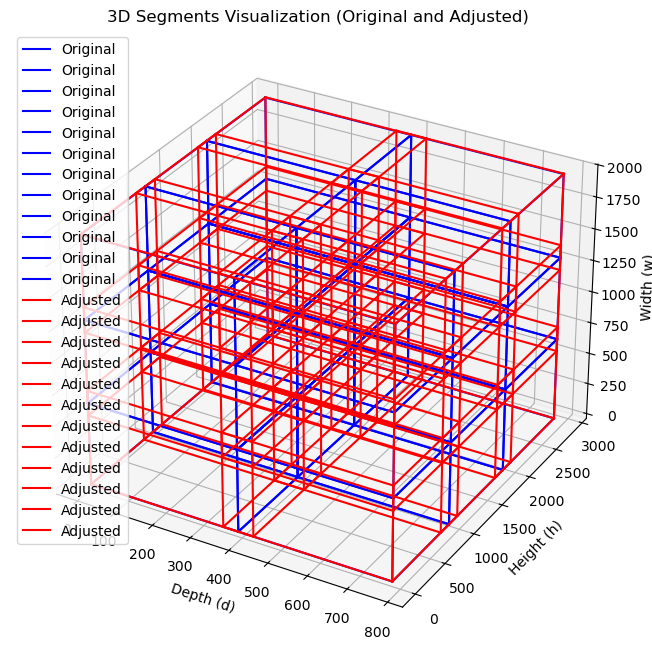

In [36]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw original segments in blue
for coords in main_coords:
    d_start, d_end, h_start, h_end, w_start, w_end = coords
    
    edges = [
        ((d_start, h_start, w_start), (d_start, h_start, w_end)),
        ((d_start, h_start, w_start), (d_start, h_end, w_start)),
        ((d_start, h_start, w_start), (d_end, h_start, w_start)),
        ((d_start, h_end, w_start), (d_start, h_end, w_end)),
        ((d_start, h_end, w_start), (d_end, h_end, w_start)),
        ((d_start, h_start, w_end), (d_start, h_end, w_end)),
        ((d_start, h_start, w_end), (d_end, h_start, w_end)),
        ((d_end, h_start, w_start), (d_end, h_start, w_end)),
        ((d_end, h_start, w_start), (d_end, h_end, w_start)),
        ((d_start, h_end, w_end), (d_end, h_end, w_end)),
        ((d_end, h_end, w_start), (d_end, h_end, w_end)),
        ((d_end, h_start, w_end), (d_end, h_end, w_end))
    ]
    
    for start, end in edges:
        x_vals = [start[0], end[0]]
        y_vals = [start[1], end[1]]
        z_vals = [start[2], end[2]]
        ax.plot(x_vals, y_vals, z_vals, color='b', label='Original' if coords == main_coords[0] else "")

# Draw adjusted segments in red
for coords in adjusted_main:
    d_start, d_end, h_start, h_end, w_start, w_end = coords
    
    edges = [
        ((d_start, h_start, w_start), (d_start, h_start, w_end)),
        ((d_start, h_start, w_start), (d_start, h_end, w_start)),
        ((d_start, h_start, w_start), (d_end, h_start, w_start)),
        ((d_start, h_end, w_start), (d_start, h_end, w_end)),
        ((d_start, h_end, w_start), (d_end, h_end, w_start)),
        ((d_start, h_start, w_end), (d_start, h_end, w_end)),
        ((d_start, h_start, w_end), (d_end, h_start, w_end)),
        ((d_end, h_start, w_start), (d_end, h_start, w_end)),
        ((d_end, h_start, w_start), (d_end, h_end, w_start)),
        ((d_start, h_end, w_end), (d_end, h_end, w_end)),
        ((d_end, h_end, w_start), (d_end, h_end, w_end)),
        ((d_end, h_start, w_end), (d_end, h_end, w_end))
    ]
    
    for start, end in edges:
        x_vals = [start[0], end[0]]
        y_vals = [start[1], end[1]]
        z_vals = [start[2], end[2]]
        ax.plot(x_vals, y_vals, z_vals, color='r', label='Adjusted' if coords == adjusted_main[0] else "")

# Set labels and show plot
ax.set_xlabel('Depth (d)')
ax.set_ylabel('Height (h)')
ax.set_zlabel('Width (w)')
ax.set_title('3D Segments Visualization (Original and Adjusted)')
ax.legend()
plt.show()


In [38]:
import numpy as np
import tifffile as tiff

# Load the 3D TIFF image
image = original_image

# # List of coordinates
# adjusted_main = [
#     (0, 200, 0, 682, 0, 612),
#     (0, 200, 0, 682, 412, 1024),
#     (0, 200, 482, 1164, 0, 612),
#     (0, 200, 482, 1164, 412, 1024),
#     (190, 390, 0, 682, 0, 612),
#     (190, 390, 0, 682, 412, 1024),
#     (190, 390, 482, 1164, 0, 612),
#     (190, 390, 482, 1164, 412, 1024)
# ]

# Process each crop
cropped_images = []
for i, (z_start, z_end, y_start, y_end, x_start, x_end) in enumerate(adjusted_main):
    print(f"Cropping section {i}...")
    cropped = image[z_start:z_end, y_start:y_end, x_start:x_end]
    cropped_images.append(cropped)
    # Save each cropped section if needed
    tiff.imwrite(f'output\Heart2_round3\Heart2_round3_cropped_section_{i}.tif', cropped)

print(f"{len(cropped_images)} cropped images saved successfully.")


Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
Cropping section {i}...
18 cropped images saved successfully.
